In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import timeit
from jax import grad
import jax.numpy as jnp
from sympy import *

# 1.

Matrix multiplication of two matrices of $(n,k)$ and $(k,m)$ results in a $(n,m)$ matrix where each element is calculated by multiplying its corresponding row in first matrix with corresponding column in second matrix. While multiplying a row with a column, $k$ multiplications and $k-1$ additions are performed.

Hence, the total multiplications are $nmk$ and the total additions are $nm(k-1).$

# 2.

In [43]:
def mat_mul(mat_A, mat_B):
    ans = [[0] * len(mat_B[0]) for _ in range(len(mat_A))]
    for row in range(len(mat_A)):
        for col in range(len(mat_B[0])):
            for k in range(len(mat_A[0])):
                ans[row][col] += mat_A[row][k] * mat_B[k][col]
    return ans

In [44]:
n = np.random.randint(10,50)
k = np.random.randint(10,50)
m = np.random.randint(10,50)
mat_A = np.random.rand(n,k)
mat_B = np.random.rand(k,m)
print("A:", mat_A.shape)
print("B:", mat_B.shape)
print("Matrix multiplication using lists of lists")
print("A X B:", np.array(mat_mul(mat_A, mat_B)).shape)
print("Time Taken")
%timeit mat_mul(mat_A, mat_B)
print("Matrix multiplication using numpy")
print("A X B:", np.matmul(mat_A, mat_B).shape)
print("Time Taken")
%timeit np.matmul(mat_A, mat_B)

A: (34, 19)
B: (19, 37)
Matrix multiplication using lists of lists
A X B: (34, 37)
Time Taken
35.5 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Matrix multiplication using numpy
A X B: (34, 37)
Time Taken
12.5 µs ± 2.97 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Using NumPy is faster as np.matmul takes $O(n^{2.371552})$ given by Duan, Wu and, Zhou while the conventional method takes $O(n^{3})$ time.

# 3.

We know that median of a n-sized list is the $\frac{n+1}{2}^{th}$ highest element for odd 'n' and mean of $\frac{n}{2}^{th}$ and $(\frac{n}{2}+1)^{th}$ highest element for even 'n'.

By the given approach of finding iteratively the highest element in one pass, second highest element in 2 passes, finding the $\frac{n+1}{2}^{th}$ highest element takes $\frac{n+1}{2}$ passes. Each pass is of time complexity $O(n)$, thus the time complexity of the algorithm is $O(n^{2})$.

A better method would be to sort the list first which can be done in time complexity of $O(n\log{n})$ and then directly choose the $\frac{n+1}{2}^{th}$ element in the sorted list in $O(1)$ time complexity. Hence, the time complexity of this algorithm is $O(n\log{n})$.




In [45]:
# Iterative Approach
def median_iter(arr):
  n = len(arr)
  sz = n
  for i in range(int((n+3)/2)):
    max = arr[0]
    max_idx = 0
    j = 0
    while j != sz:
      if arr[j] > max:
        max = arr[j]
        max_idx = j
      j+=1
    temp = arr[max_idx]
    arr[max_idx] = arr[sz-1]
    arr[sz-1] = temp
    sz-=1
  if n%2 != 0:
    return(arr[sz+1])
  else:
    return((arr[sz]+arr[sz+1])/2)

# Sorting Approach
def median_sort(arr):
  n = len(arr)
  arr_sort = sorted(arr)
  if n%2 != 0:
    return(arr_sort[int((n-1)/2)])
  else:
    return((arr_sort[int(n/2)]+arr_sort[int(n/2)-1])/2)

In [46]:
n = np.random.randint(10,50)
arr = np.random.randint(100, size=(n))
print("Iterative Approach")
print("Median:", median_iter(arr))
print("Time Taken")
%timeit median_iter(arr)
print("Sorting Approach")
print("Median:", median_sort(arr))
print("Time Taken")
%timeit median_sort(arr)
print("Numpy Median")
print("Median:", np.median(arr))
print("Time Taken")
%timeit np.median(arr)

Iterative Approach
Median: 42.5
Time Taken
232 µs ± 71.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Sorting Approach
Median: 42.5
Time Taken
10.5 µs ± 115 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Numpy Median
Median: 42.5
Time Taken
54.9 µs ± 7.63 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# 4.

Gradient w.r.t to x = $2xy+y^3cos(x)$

Gradient w.r.t to y = $x^2+3y^2sin(x)$

# 5.

In [47]:
def func(x,y):
    return (x*x*y)+ (y**3)*jnp.sin(x)

In [48]:
x = 2.0
y = 3.0
print("For values x,y=",x,y)
grad_x = 2*x*y+(y**3)*np.cos(x)
grad_y = (x**2)+3*(y**2)*np.sin(x)
print("Gradient calculated manually")
print("W.r.t x:", grad_x)
print("W.r.t y:", grad_y)
jax_grad_x = grad(func,argnums=0)
jax_grad_y = grad(func,argnums=1)
print("Gradient calculated using JAX")
print("W.r.t x:", jax_grad_x(x,y))
print("W.r.t y:", jax_grad_y(x,y))

For values x,y= 2.0 3.0
Gradient calculated manually
W.r.t x: 0.7640354132271554
W.r.t y: 28.551030524293406
Gradient calculated using JAX
W.r.t x: 0.7640352
W.r.t y: 28.55103


# 6.

In [49]:
def func(x,y):
    return (x*x*y)+ (y**3)*sin(x)

In [50]:
x = Symbol('x')
y = Symbol('y')

print(diff(func(x,y),x))
print(diff(func(x,y),y))

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


# 9.

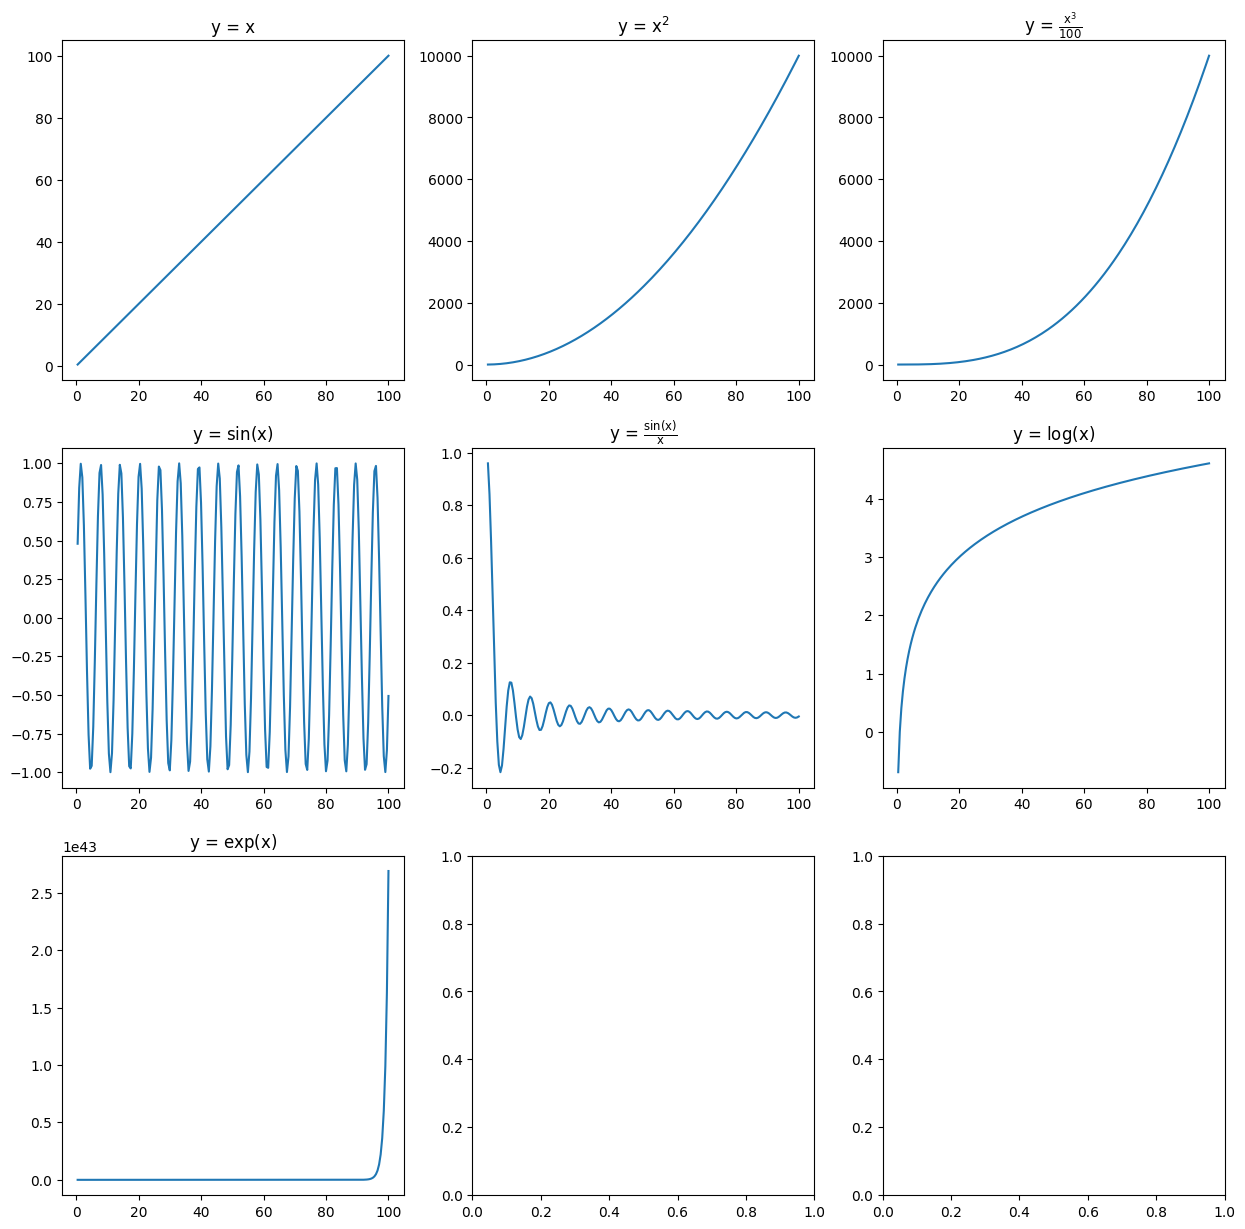

In [51]:
x = np.arange(0.5, 100.5, 0.5)
# generating functions for each of the 7 parts
y = np.array([x, np.square(x), np.power(x,3)/100, np.sin(x), np.sin(x)/x, np.log(x), np.exp(x)])
y_titles = np.array([r'y = x', r'y = $\mathregular{x^2}$',
                     r'y = $\mathregular{\frac{x^3}{100}}$',
                     r'y = $\mathregular{\sin({x})}$',
                     r'y = $\mathregular{\frac{\sin({x})}{x}}$',
                     r'y = $\mathregular{\log({x})}$',
                     r'y = $\mathregular{\exp({x})}$'])
fig ,ax = plt.subplots(3, 3, figsize = (15,15))
ax = ax.flat
for i in range(7):
  ax[i].plot(x,y[i])
  ax[i].set_title(y_titles[i])

# 10.

In [52]:
matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])
df

,a,b,c,d,e
0,1.998727,1.758256,1.015497,1.804256,1.610808
1,1.238462,1.628991,1.423036,1.687163,1.998671
2,1.240525,1.319908,1.224292,1.280361,1.380098
3,1.042187,1.989230,1.335288,1.106468,1.798948
4,1.108257,1.364066,1.122959,1.646282,1.437084
5,1.449743,1.725200,1.231438,1.418874,1.191698
6,1.261051,1.575481,1.891303,1.537844,1.054444
7,1.550845,1.075600,1.369063,1.646410,1.963353
8,1.986053,1.198476,1.044056,1.837005,1.179517
9,1.032874,1.185584,1.621363,1.690709,1.357154


In [53]:
print("Standard Deviations of Columns\n", df.std(), sep='')
print("The column with highest standrad deviation is Column", df.std().idxmax(),'\n')
print("Mean Values of Rows\n", df.mean(axis=1), sep='')
print("The row with lowest mean is Row", df.mean(axis=1).idxmin())

Standard Deviations of Columns
a    0.304666
b    0.333158
c    0.272240
d    0.257318
e    0.304505
dtype: float64
The column with highest standrad deviation is Column b 

Mean Values of Rows
0     1.637509
1     1.595264
2     1.289037
3     1.454424
4     1.335730
5     1.403390
6     1.464024
7     1.521054
8     1.449021
9     1.377537
10    1.708772
11    1.471075
12    1.367522
13    1.528821
14    1.734424
15    1.259524
16    1.403474
17    1.773193
18    1.549878
19    1.416959
dtype: float64
The row with lowest mean is Row 15


# 11.

In [54]:
df['f'] = df.sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
df

,a,b,c,d,e,f,g
0,1.998727,1.758256,1.015497,1.804256,1.610808,8.187544,GT8
1,1.238462,1.628991,1.423036,1.687163,1.998671,7.976322,LT8
2,1.240525,1.319908,1.224292,1.280361,1.380098,6.445185,LT8
3,1.042187,1.989230,1.335288,1.106468,1.798948,7.272121,LT8
4,1.108257,1.364066,1.122959,1.646282,1.437084,6.678648,LT8
5,1.449743,1.725200,1.231438,1.418874,1.191698,7.016952,LT8
6,1.261051,1.575481,1.891303,1.537844,1.054444,7.320122,LT8
7,1.550845,1.075600,1.369063,1.646410,1.963353,7.605271,LT8
8,1.986053,1.198476,1.044056,1.837005,1.179517,7.245106,LT8
9,1.032874,1.185584,1.621363,1.690709,1.357154,6.887684,LT8


In [55]:
df['g'].value_counts()

LT8    16
GT8     4
Name: g, dtype: int64

In [56]:
print("Standard deviation of the column 'f'")
print("LT8", df[df['g'] == "LT8"]['f'].std(), sep='\t')
print("GT8", df[df['g'] == "GT8"]['f'].std(), sep='\t')

Standard deviation of the column 'f'
LT8	0.4647525987076523
GT8	0.28574652556093005


# 13

In [57]:
def argmin(arr):
  idx = 0
  min = arr[0]
  for i in range(len(arr)):
    if arr[i]<min:
      idx = i
      min = arr[i]
  return idx

In [58]:
arr = np.array([2,4,10,100,12,6,1,3,5])
print("Index of minimum element")
print("Using defined argmin:",argmin(arr))
print("Using np.argmin:", np.argmin(arr))

Index of minimum element
Using defined argmin: 6
Using np.argmin: 6
